# **AISaturdays ECG Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de esta semana. Esta vez detectaremos casos de enfermedad cardiovascular a través del análisis de los latidos del corazón.

**Instrucciones:**

- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: Pandas, MatPlotLib, Numpy y keras.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Aplicar un modelo de NN .
- Mejorar la predicción optimizando el modelo.

Este ejercicio está basado en un [paper](https://arxiv.org/pdf/1805.00794.pdf) que resuelve el problema al que nos enfrentamos. Tomadlo como una fuente de inspiración.

¡Empecemos!

#0. Importación de librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Análisis de datos

#1. Importa el dataset.

In [245]:
#Solo una linea de código.
data = pd.read_csv('mitbih_train.csv', header=None)

#2. ¿Que forma tiene el dataset?

In [246]:
#Solo una linea de código.
data.shape

(87554, 188)

#3. Vamos a ver como son los datos. Muestra las primero cinco filas del dataset.

In [247]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Este es el dataset de hoy. Esta vez, cada columna representa una lectura del electrocardiograma (recogido a 125Hz). Si en total hay 187 lecturas, en estas columnas tenemos alrededor de segundo y medio de pulsaciones. La última columna contiene la categoría a la que pertenecen estas pulsaciones. En total hay cinco, cada una representada por un número: 

- Normal: 0
- Arritmia prematura (atrial, aberrante-atrial, nodal o supra-ventricular) : 1
- Contracción prematura ventricular o escape ventricular: 2
- Fusión de la contracción ventricular y normal: 3
- Resucitación, fusión de normal y resucitación o inclasificable: 4


#4. Describe la distribución de los datos.

In [248]:
#Solo una linea de código.
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


#5. Vamos a ver como es uno de estos electrocardiogramas. Haz una gráfica con los datos de una de las filas.

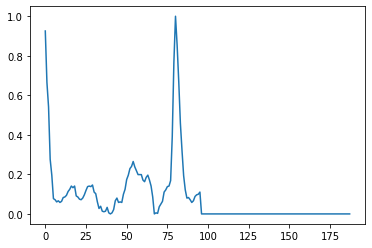

In [249]:
plt.plot(data.iloc[3])

#6. Ahora que hemos visualizadon nuestros datos, vamos a trabajar con ellos. Primero tenemos que dividirlos entre input y output. Divide el dataset en dos: una parte que contenga todas las columnas con datos del electrocardiograma y otro con las etiquetas. Transformar el dataset en un array de Numpy lo hace mas facil porque puedes usar slicing. 

In [250]:
#Dos lineas de código, usando .values o .loc. y slicing
M = data.values
X = M[ : ,:-1]
y = M[ : , -1].astype(int)

#7. Crea arrays con los índices de los ejemplos que pertenecen a cada categoría. La función [np.argwhere](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html) biene muy bien aquí. 

In [251]:
#5 lineas de código
C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

#8. Cuenta cuantos ejemplos tenemos de cada categoría.

In [252]:
#5 lineas de código
u = {'N': C0, 'S': C1, 'V': C2, 'F': C3, 'Q': C4}
www = []
for k in u:
    print('Hay {} muestras de la categoría {}'.format(len(u[k]), k))
    www.append(len(u[k]))

Hay 72471 muestras de la categoría N
Hay 2223 muestras de la categoría S
Hay 5788 muestras de la categoría V
Hay 641 muestras de la categoría F
Hay 6431 muestras de la categoría Q


#9. Para ver mejor cuantos tenemos de cada tipo vamos a hacer un gráfico de barras. Utiliza [plt.bar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) con una label apropiada para cada barra.

<BarContainer object of 5 artists>

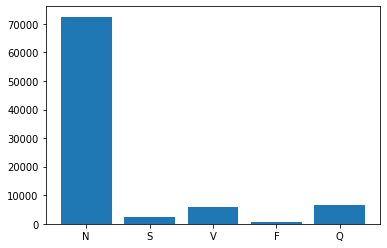

In [253]:
#Dos lineas de código
labels = list(u.keys())
plt.bar(labels, www)

#10. Finalmente, vamos a comparar electrocardiogramas de un tipo con los otros con otra gráfica. Dibuja un electrocardiograma de cada tipo, uno encima del otro. Puntos extra por ponerle un título y leyenda.

Text(0.5, 1.0, 'Diferentes clases')

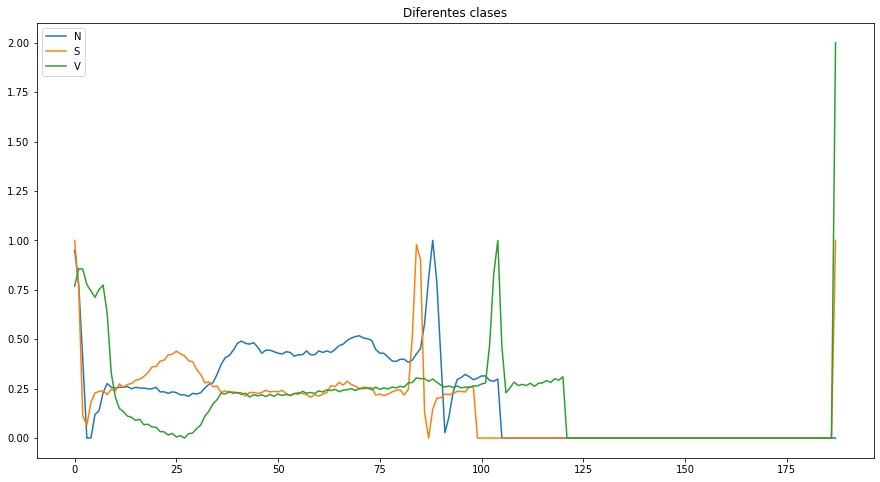

In [254]:
#6 lineas de código
plt.figure(figsize=(15,8))
plt.plot(M[C0[20]], label='N')
plt.plot(M[C1[20]], label='S')
plt.plot(M[C2[10]], label='V')
plt.legend()
plt.title('Diferentes clases')

## Preparación de datos

#11. La mejor forma de tratar con categorias es utilizar un OneHotEncoding. Transforma Y a su OneHotEncoding.

In [255]:
from keras.utils.np_utils import to_categorical
y_Hot = to_categorical(y, num_classes = 5)

#12. Comprueba que el OneHotEncoding ha funcionado, es decir, que por cada columna en la Y original se han creado 5, y que los valores del original y el OneHotEncoding se corresponden entre sí.

In [265]:
print(y.shape)
print(y_Hot.shape)
print(y[20000])
print(y_Hot[20000])

(87554,)
(87554, 5)
0
[1. 0. 0. 0. 0.]


#13. Mezcla X e Y de forma aleatoria(para que las etiquetas todavía se refieran a los ejemplos originales, usa [shuffle](https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html)).

In [258]:
from sklearn.utils import shuffle

X_shuffled, y_shuffled = shuffle(X, y_Hot)

In [259]:
#Comprobamos que tienen la misma forma
assert X_shuffled.shape == X.shape
assert y_shuffled.shape == y_Hot.shape

In [266]:
#liberamos memoria
del X
del y_Hot

#14. Para poder introducir los datos en el modelo, necesitamos que cada punto de información esté solo dentro del array (no podemos dar un array como valor). Antes teníamos los datos estructurados así:

$ X = [[a_1,a_2,a_3...,a_n],[b_1,b_2,b_3...,b_n]...[z_1,z_2,z_3,z_n] $

Para poder usarlos necesitamos aislar cada uno de esos valores, sin eliminar su agrupación por ejemplos. Es decir:

$ X = [[[a_1],[a_2],[a_3]...,[a_n]],[[b_1],[b_2],[b_3]...,[b_n]]...[[z_1],[z_2],[z_3],[z_n]] $

Esto se consigue utilizando la función [expand_dims](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) de numpy.

In [271]:
#Solo una linea de código
X = np.expand_dims(X_shuffled, 2)

#15. ¡Ya casi estamos! Solo no queda hacer un train_test_split y estaría todo listo para implementar el modelo.

In [273]:
#Dos lineas de código
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_shuffled, test_size=0.2)

## Modelos prometedores

En esta parte del challenge os planteamos un modelo ya creado para que podais ver como funciona y trastear con los diferentes parámetros. 

Primero importamos unas pocas librerias para plantear el modelo:

In [275]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils

from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight

from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
import itertools

#16. ¿Cual es la longitud de la entrada? (Esta será la cantidad de neuronas que tendremos en la primera capa).¿Cuantas neuronas tendremos en nuestra última capa? También necesitamos un batch_size si queremos entrenar la red neuronal con SGD.

In [285]:
signal_length = 187
batch_size = 1024
n_classes = 5

Este es el modelo de la red neuronal. Tiene cuatro capas, dos de ellas ocultas, y utiliza como función de activación ReLU. 

In [286]:
model = Sequential()

model.add(Conv1D(32, kernel_size=(5), input_shape=(signal_length, 1)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Conv1D(32, (4)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=(2)))

model.add(Flatten())

model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))


model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 183, 32)           192       
_________________________________________________________________
dropout_11 (Dropout)         (None, 183, 32)           0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 183, 32)           128       
_________________________________________________________________
activation_9 (Activation)    (None, 183, 32)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 180, 32)           4128      
_________________________________________________________________
dropout_12 (Dropout)         (None, 180, 32)           0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 180, 32)           128       
__________

Para compilar el modelo, se llama .compile(). Aquí se especifica que función de pérdida usamos, que optimizador y que métricas queremos guardar de cada epoch.

In [287]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Ahora entrenamos el modelo un número de épocas y con una batch_size especifica. Esto nos devuelve un objeto history con la accuracy de todas las fases de entrenamiento.

In [288]:
history = model.fit(X_train, y_train,
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

Train on 70043 samples, validate on 17511 samples
Epoch 1/75
70043/70043 [==============================] - 7s 98us/step - loss: 0.7200 - acc: 0.8017 - val_loss: 0.5794 - val_acc: 0.8304
Epoch 2/75
70043/70043 [==============================] - 4s 56us/step - loss: 0.4573 - acc: 0.8677 - val_loss: 0.5033 - val_acc: 0.8366
Epoch 3/75
70043/70043 [==============================] - 4s 57us/step - loss: 0.3433 - acc: 0.9043 - val_loss: 0.4597 - val_acc: 0.8454
Epoch 4/75
70043/70043 [==============================] - 4s 57us/step - loss: 0.2987 - acc: 0.9165 - val_loss: 0.3736 - val_acc: 0.8838
Epoch 5/75
70043/70043 [==============================] - 4s 56us/step - loss: 0.2710 - acc: 0.9265 - val_loss: 0.3309 - val_acc: 0.9110
Epoch 6/75
70043/70043 [==============================] - 4s 58us/step - loss: 0.2497 - acc: 0.9330 - val_loss: 0.3326 - val_acc: 0.9079
Epoch 7/75
70043/70043 [==============================] - 4s 57us/step - loss: 0.2313 - acc: 0.9383 - val_loss: 0.3018 - val_acc

#17. Accede a la accuracy histórica del modelo (con el atributo history)

In [289]:
history.history

{'val_loss': [0.5794491728262602,
  0.5032539704979321,
  0.4597109428588153,
  0.37362552791141196,
  0.3309324272276911,
  0.33260618412925586,
  0.3018142861071009,
  0.2419184845579759,
  0.23615092100802879,
  0.19773656910848159,
  0.17646082025505297,
  0.17991751823690247,
  0.16437613935871484,
  0.15487157004437505,
  0.14254470407642839,
  0.1396190372838856,
  0.13377131860426456,
  0.1330472969063774,
  0.12406021257743634,
  0.12305181331617264,
  0.13361667749407555,
  0.12091911540420798,
  0.1155246999702978,
  0.12674686576983663,
  0.11689468346360436,
  0.11496024573406143,
  0.1072059675847335,
  0.1067889579864567,
  0.10658920338801453,
  0.09911922266119981,
  0.09964179745322972,
  0.09881003542540653,
  0.11220410321743687,
  0.10927641317295148,
  0.09356477470278916,
  0.094777288423904,
  0.09754192106635098,
  0.09460256887911171,
  0.10867693816572743,
  0.09913253256244081,
  0.08813163009159729,
  0.08961988034803382,
  0.08956332553243383,
  0.08914412

#18. Ahora podemos ver si nuestro modelo está haciendo overfitting. Dibuja una gráfica con la accuracy en train y en validation usando los datos del objeto history.

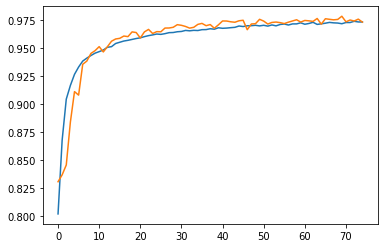

In [290]:
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')

#19. Lo mismo, pero con la pérdida

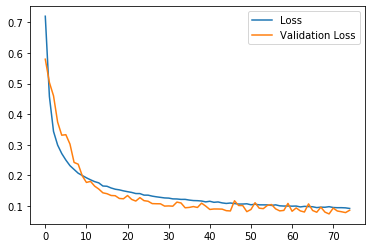

In [291]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss' )
plt.legend()

#20. Vamos a ver lo que predice con el X_test

In [299]:
y_pred = model.predict(X_test, batch_size=1000)

#21. ¿Que dimensiones tiene la predicción y_pred?

In [300]:
#Solo una linea de código
y_pred.shape

(17511, 5)

#22. Compara una predicción con el valor esperado utilizando un gráfico de barras.

[0. 0. 0. 0. 1.]


<BarContainer object of 5 artists>

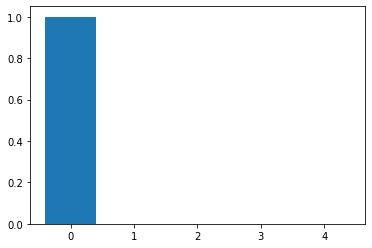

In [306]:
print(y_test[299])
plt.bar(range(n_classes), height=y_pred[4])

¿El modelo plantea una sola posibilidad o probabilidades al estimar la categoría?

Este snippet de código genera un report del modelo, y el siguiente una matriz de confusión. Utilizadlo para evaluar vuestro modelo.

In [34]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3632
          1       0.93      0.55      0.69       104
          2       0.97      0.79      0.87       289
          3       0.76      0.61      0.68        31
          4       0.98      0.94      0.96       323

avg / total       0.97      0.97      0.96      4379



Normalized confusion matrix


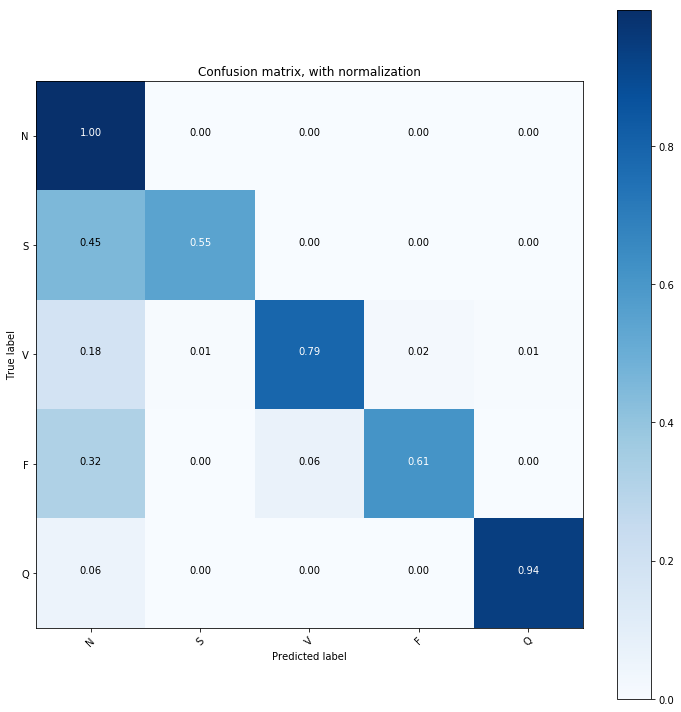

In [35]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],
                      title='Confusion matrix, with normalization',
                      normalize=True)
plt.show()

**Preguntas:**
- Si tomamos todo lo que no sea normal como positivo, ¿el modelo se equivoca mas en falsos positivos o en falsos negativos?
- ¿Que categoría genera mayor error?
- ¿Existe overfitting?
- ¿Como afecta batch_size al entrenamiento?

Ahora os toca a vosotros mejorar el modelo. Probad con otros optimizadores, cambiar la función de coste, volveros locos con el batch_size..... El paper del principio puede dar alguna pista. Como siempre, el que tenga la mejor score, ¡tiene premio!